In [39]:
%matplotlib inline
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
import warnings

# sklearn의 n_init 관련 FutureWarning 무시
warnings.filterwarnings('ignore', message="The default value of `n_init` will change from 10 to 'auto'")

# seaborn의 use_inf_as_na 관련 FutureWarning 무시
warnings.filterwarnings('ignore', message="use_inf_as_na option is deprecated")


In [5]:
credit_df1 = pd.read_csv(r'C:\Users\user\Downloads\CC_GENERAL.csv')
credit_df1.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# PCA & Clustering

In [8]:
credit_df1.info

<bound method DataFrame.info of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE 

In [10]:
credit_df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [28]:
credit_df1.columns.value_counts()

CUST_ID                             1
BALANCE                             1
PRC_FULL_PAYMENT                    1
MINIMUM_PAYMENTS                    1
PAYMENTS                            1
CREDIT_LIMIT                        1
PURCHASES_TRX                       1
CASH_ADVANCE_TRX                    1
CASH_ADVANCE_FREQUENCY              1
PURCHASES_INSTALLMENTS_FREQUENCY    1
ONEOFF_PURCHASES_FREQUENCY          1
PURCHASES_FREQUENCY                 1
CASH_ADVANCE                        1
INSTALLMENTS_PURCHASES              1
ONEOFF_PURCHASES                    1
PURCHASES                           1
BALANCE_FREQUENCY                   1
TENURE                              1
Name: count, dtype: int64

### 고객 아이디를 제외한 데이터 분리

In [17]:
credit_df2 = credit_df1.drop('CUST_ID', axis = 1)

credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 표준화

In [83]:
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화 진행
scaled_credit_df2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,9.756065e-17,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960380,-0.486189,-3.498345e-01,1.183885,-4.122537
8946,-0.742382,0.518055,-0.329118,-0.356914,-0.122817,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960380,-0.503368,9.756065e-17,-0.525522,-4.122537
8947,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,-0.476043,-0.390617,-0.960380,-0.570583,-3.354467e-01,0.329182,-4.122537
8948,-0.745133,-0.185466,-0.469526,-0.356914,-0.454551,-0.449327,-1.221690,-0.678623,-0.916944,0.157518,-0.182988,-0.591763,-1.097795,-0.580503,-3.468871e-01,0.329182,-4.122537


### PCA num_components=2

In [85]:
X = scaled_credit_df2.copy()

# 객체
pca = PCA(n_components=2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df

,0,1
0,-1.682126,-1.076390
1,-1.138232,2.506337
2,0.969630,-0.383499
3,-0.873579,0.043163
4,-1.599344,-0.688542
...,...,...
8945,-0.359609,-2.016033
8946,-0.564337,-1.639031
8947,-0.926152,-1.810684
8948,-2.336421,-0.657929


### elbow plot

<Axes: >

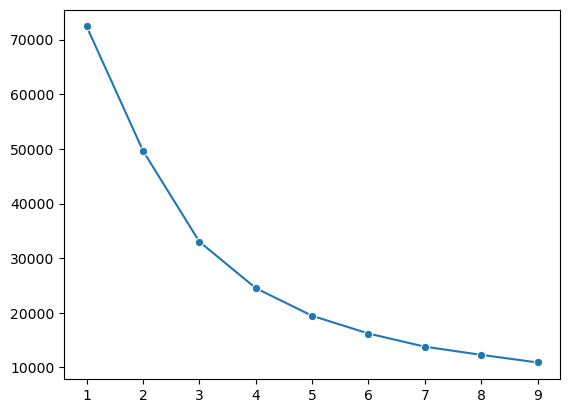

In [50]:
from sklearn.cluster import KMeans
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

#시각화
sns.lineplot(x=ks, y=inertias, marker='o')

### k=6이 최적으로 확인됨

<Axes: xlabel='PC1', ylabel='PC2'>

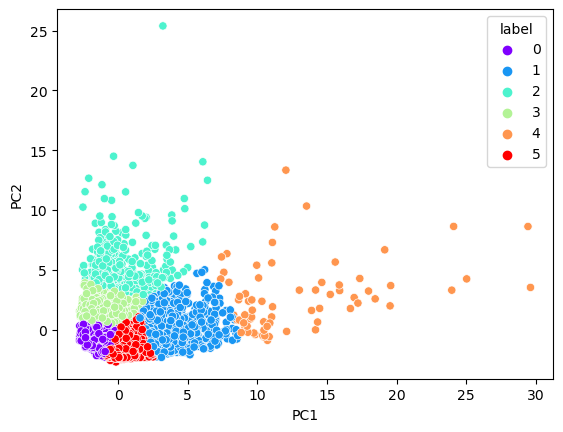

In [64]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터
x, y = pca_df[0], pca_df[1]

# PCA 진행한 데이터프레임에 클러스터 번호 부여
pca_km_df = pd.DataFrame({'PC1': x, 'PC2':y, 'label':labels})

# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')

### 클러스터 결과 해석

In [60]:
# k = 6인 k-means 클러스터링 진행
model = KMeans(n_clusters=6, random_state = 111)
model.fit(pca_df)

labels=model.labels_  #고객마다 부여할 클러스터

# 원본 데이터에 클러스터 부여
credit_df1['cluster'] = labels

In [62]:
credit_df1['CUST_ID'].groupby(credit_df1['cluster']).count()

cluster
0     942
1    2980
2     431
3    1580
4    2949
5      68
Name: CUST_ID, dtype: int64

### .T 를 사용하여 행과 열을 바꿔준다

In [75]:
credit_df1.groupby(credit_df1['cluster']).mean(numeric_only=True).T

cluster,0,1,2,3,4,5
BALANCE,2377.128446,752.840196,6204.108979,2894.414305,653.028910,5094.163240
BALANCE_FREQUENCY,0.984349,0.765732,0.977807,0.948006,0.900883,0.977139
PURCHASES,3889.792442,212.189852,708.445568,267.821076,947.616229,17046.403235
ONEOFF_PURCHASES,2432.561879,154.415151,451.321462,185.518924,435.348976,11458.830147
INSTALLMENTS_PURCHASES,1457.867505,58.131134,257.279443,82.338051,512.572709,5587.573088
CASH_ADVANCE,502.737101,378.877176,6947.708667,2387.107874,104.251218,1246.094188
PURCHASES_FREQUENCY,0.952202,0.181288,0.332345,0.190118,0.828495,0.949510
ONEOFF_PURCHASES_FREQUENCY,0.660313,0.071704,0.168825,0.090456,0.240079,0.773908
PURCHASES_INSTALLMENTS_FREQUENCY,0.770525,0.103170,0.224401,0.107092,0.646225,0.835183
CASH_ADVANCE_FREQUENCY,0.074165,0.084142,0.589569,0.352214,0.024358,0.095588


### 대출과 관련있어 보이는 잔액(BALANCE), 잔액 갱신 빈도(BALANCE_FREQUENCY)을 활용해 특징 살펴보기

In [80]:
credit_df1.groupby(credit_df1['cluster']).mean(numeric_only=True).T.iloc[[0,1],]

cluster,0,1,2,3,4,5
BALANCE,2377.128446,752.840196,6204.108979,2894.414305,653.028910,5094.163240
BALANCE_FREQUENCY,0.984349,0.765732,0.977807,0.948006,0.900883,0.977139


클러스터 0: 평균 잔액이 중간인 편이며 잔액 갱신 빈도가 가장 높은 고객군  
클러스터 1: 평균 잔액이 낮은 편이며 잔액 갱신 빈도가 가장 낮은 고객군  
클러스터 2: 평균 잔액이 가장 높은 편이며 잔액 갱신 빈도가 높은 편인 고객군  
클러스터 3: 평균 잔액이 중간 정도이며 잔액 갱신 빈도가 중간 정도인 고객군  
클러스터 4: 평균 잔액이 가장 낮으며 잔액 갱신 빈도가 낮은 편인 고객군  
클러스터 5: 평균 잔액이 높은 편이며 잔액 갱신 빈도가 높은 편인 고객군  